# Install and Import dependencies.

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [1]:
mp_holistic??

Object `mp_holistic` not found.


In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

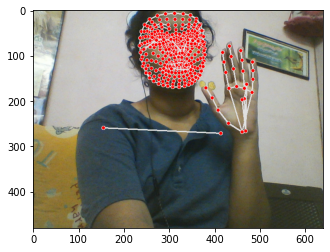

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [14]:
results.face_landmarks.landmark

[x: 0.5034858584403992
y: 0.23339271545410156
z: -0.04002660885453224
, x: 0.5023074746131897
y: 0.186117023229599
z: -0.05103209242224693
, x: 0.5011582374572754
y: 0.20691457390785217
z: -0.03192129358649254
, x: 0.48978161811828613
y: 0.14809568226337433
z: -0.031199341639876366
, x: 0.5017604231834412
y: 0.1717291921377182
z: -0.051851484924554825
, x: 0.499977707862854
y: 0.156277596950531
z: -0.04475950077176094
, x: 0.49491995573043823
y: 0.12292903661727905
z: -0.009076417423784733
, x: 0.41803327202796936
y: 0.13837513327598572
z: 0.016928689554333687
, x: 0.492623507976532
y: 0.08970779925584793
z: 0.004293531179428101
, x: 0.49197918176651
y: 0.070408895611763
z: 0.006679966114461422
, x: 0.4876158833503723
y: 0.015583693981170654
z: 0.03168097510933876
, x: 0.5037766098976135
y: 0.23990114033222198
z: -0.04000100865960121
, x: 0.503591775894165
y: 0.24612438678741455
z: -0.037537697702646255
, x: 0.5029945969581604
y: 0.24983364343643188
z: -0.03406014293432236
, x: 0.50327

In [15]:
results.face_landmarks.landmark[0]

x: 0.5034858584403992
y: 0.23339271545410156
z: -0.04002660885453224

In [16]:
results.face_landmarks.landmark[0].x

0.5034858584403992

In [17]:
results.face_landmarks.landmark[0].y

0.23339271545410156

In [18]:
results.face_landmarks.landmark[0].z

-0.04002660885453224

In [19]:
results.face_landmarks.landmark[0].visibility

0.0

In [20]:
len(results.left_hand_landmarks.landmark)

21

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test

array([ 0.51448804,  0.19684596, -0.7258538 , ...,  0.        ,
        0.        ,  0.        ])

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.51448804,  0.19684596, -0.7258538 , ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [83]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [84]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(90, 30, 1662)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(5, 3)

In [41]:
y_train.shape

(85, 3)

In [42]:
X_test.shape

(5, 30, 1662)

In [43]:
X_train.shape

(85, 30, 1662)

# Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 145ms/step - loss: 1.4588 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.1454 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 140ms/step - loss: 2.3005 - categorical_accuracy: 0.2471
Epoch 4/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.0833 - categorical_accuracy: 0.4235
Epoch 5/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.4857 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.4559 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.1133 - categorical_accuracy: 0.2000
Epoch 8/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.8757 - categorical_accuracy: 0.2118
Epoch 9/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.0996 - categorical_accuracy:

3/3 [==============================] - 0s 133ms/step - loss: 1.0438e-04 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 128ms/step - loss: 9.8125e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 143ms/step - loss: 9.3848e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 135ms/step - loss: 8.9275e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 130ms/step - loss: 8.6884e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 131ms/step - loss: 8.1667e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 145ms/step - loss: 7.8465e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 145ms/step - loss: 7.5947e-05 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 146ms/step - l

Epoch 287/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.1555 - categorical_accuracy: 0.9647
Epoch 288/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1498 - categorical_accuracy: 0.9529
Epoch 289/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1674 - categorical_accuracy: 0.9529
Epoch 290/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.1043 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0986 - categorical_accuracy: 0.9647
Epoch 292/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0901 - categorical_accuracy: 0.9765
Epoch 293/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0668 - categorical_accuracy: 0.9647
Epoch 294/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0706 - categorical_accuracy: 0.9529
Epoch 295/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0603 - cat

3/3 [==============================] - 0s 125ms/step - loss: 6.5709e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.4535e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 118ms/step - loss: 6.3364e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.2086e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 130ms/step - loss: 6.1178e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.9876e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 115ms/step - loss: 5.8741e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.8067e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 123ms/step - loss: 1.4451e-05 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4342e-05 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4238e-05 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4144e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.4046e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.3955e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.3841e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.3753e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 120ms/step - loss: 6.6992e-06 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.6712e-06 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.6417e-06 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 124ms/step - loss: 6.6179e-06 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.5758e-06 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.5492e-06 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.5225e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.4889e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 125ms/step - l

3/3 [==============================] - 0s 126ms/step - loss: 3.8805e-06 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.8665e-06 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.8567e-06 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.8370e-06 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.8258e-06 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.8118e-06 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.7978e-06 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.7851e-06 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 125ms/step - l

3/3 [==============================] - 0s 155ms/step - loss: 2.4683e-06 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 0s 130ms/step - loss: 2.4585e-06 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.4515e-06 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.4416e-06 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.4374e-06 - categorical_accuracy: 1.0000
Epoch 984/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.4290e-06 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.4220e-06 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.4150e-06 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 115ms/step - l

Epoch 1117/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.6605e-06 - categorical_accuracy: 1.0000
Epoch 1118/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.6563e-06 - categorical_accuracy: 1.0000
Epoch 1119/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.6521e-06 - categorical_accuracy: 1.0000
Epoch 1120/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.6465e-06 - categorical_accuracy: 1.0000
Epoch 1121/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.6423e-06 - categorical_accuracy: 1.0000
Epoch 1122/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.6381e-06 - categorical_accuracy: 1.0000
Epoch 1123/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.6352e-06 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.6296e-06 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [===========================

Epoch 1254/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.1654e-06 - categorical_accuracy: 1.0000
Epoch 1255/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.1612e-06 - categorical_accuracy: 1.0000
Epoch 1256/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1584e-06 - categorical_accuracy: 1.0000
Epoch 1257/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1556e-06 - categorical_accuracy: 1.0000
Epoch 1258/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1542e-06 - categorical_accuracy: 1.0000
Epoch 1259/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1500e-06 - categorical_accuracy: 1.0000
Epoch 1260/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1444e-06 - categorical_accuracy: 1.0000
Epoch 1261/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1430e-06 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [===========================

Epoch 1391/2000
3/3 [==============================] - 0s 131ms/step - loss: 8.3586e-07 - categorical_accuracy: 1.0000
Epoch 1392/2000
3/3 [==============================] - 0s 123ms/step - loss: 8.3446e-07 - categorical_accuracy: 1.0000
Epoch 1393/2000
3/3 [==============================] - 0s 120ms/step - loss: 8.3025e-07 - categorical_accuracy: 1.0000
Epoch 1394/2000
3/3 [==============================] - 0s 120ms/step - loss: 8.3025e-07 - categorical_accuracy: 1.0000
Epoch 1395/2000
3/3 [==============================] - 0s 120ms/step - loss: 8.2885e-07 - categorical_accuracy: 1.0000
Epoch 1396/2000
3/3 [==============================] - 0s 122ms/step - loss: 8.2604e-07 - categorical_accuracy: 1.0000
Epoch 1397/2000
3/3 [==============================] - 0s 115ms/step - loss: 8.2324e-07 - categorical_accuracy: 1.0000
Epoch 1398/2000
3/3 [==============================] - 0s 125ms/step - loss: 8.2043e-07 - categorical_accuracy: 1.0000
Epoch 1399/2000
3/3 [===========================

Epoch 1528/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.0586e-07 - categorical_accuracy: 1.0000
Epoch 1529/2000
3/3 [==============================] - 0s 136ms/step - loss: 6.0586e-07 - categorical_accuracy: 1.0000
Epoch 1530/2000
3/3 [==============================] - 0s 123ms/step - loss: 6.0306e-07 - categorical_accuracy: 1.0000
Epoch 1531/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.0165e-07 - categorical_accuracy: 1.0000
Epoch 1532/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.0025e-07 - categorical_accuracy: 1.0000
Epoch 1533/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.0025e-07 - categorical_accuracy: 1.0000
Epoch 1534/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.9885e-07 - categorical_accuracy: 1.0000
Epoch 1535/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.9604e-07 - categorical_accuracy: 1.0000
Epoch 1536/2000
3/3 [===========================

Epoch 1665/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.4738e-07 - categorical_accuracy: 1.0000
Epoch 1666/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.4738e-07 - categorical_accuracy: 1.0000
Epoch 1667/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1668/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1669/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1670/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1671/2000
3/3 [==============================] - 0s 115ms/step - loss: 4.4458e-07 - categorical_accuracy: 1.0000
Epoch 1672/2000
3/3 [==============================] - 0s 126ms/step - loss: 4.4318e-07 - categorical_accuracy: 1.0000
Epoch 1673/2000
3/3 [===========================

Epoch 1802/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.3379e-07 - categorical_accuracy: 1.0000
Epoch 1803/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.3238e-07 - categorical_accuracy: 1.0000
Epoch 1804/2000
3/3 [==============================] - 0s 130ms/step - loss: 3.3238e-07 - categorical_accuracy: 1.0000
Epoch 1805/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.3238e-07 - categorical_accuracy: 1.0000
Epoch 1806/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.3098e-07 - categorical_accuracy: 1.0000
Epoch 1807/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.3098e-07 - categorical_accuracy: 1.0000
Epoch 1808/2000
3/3 [==============================] - 0s 112ms/step - loss: 3.3098e-07 - categorical_accuracy: 1.0000
Epoch 1809/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.2958e-07 - categorical_accuracy: 1.0000
Epoch 1810/2000
3/3 [===========================

Epoch 1939/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.5385e-07 - categorical_accuracy: 1.0000
Epoch 1940/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.5244e-07 - categorical_accuracy: 1.0000
Epoch 1941/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.5244e-07 - categorical_accuracy: 1.0000
Epoch 1942/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.5104e-07 - categorical_accuracy: 1.0000
Epoch 1943/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.5104e-07 - categorical_accuracy: 1.0000
Epoch 1944/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.4824e-07 - categorical_accuracy: 1.0000
Epoch 1945/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.4824e-07 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.4824e-07 - categorical_accuracy: 1.0000
Epoch 1947/2000
3/3 [===========================

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# Make Predictions

In [51]:
res = model.predict(X_test)

In [52]:
actions[np.argmax(res[0])]

'hello'

In [53]:
actions[np.argmax(y_test[0])]

'hello'

# Save Weights

In [54]:
model.save('action.h5')

In [55]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [57]:
yhat = model.predict(X_test)

In [58]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [61]:
accuracy_score(ytrue, yhat)

1.0

# Test in Real Time

In [62]:
from scipy import stats

In [65]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)]) 
            if len(sentence)>5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.Solution

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

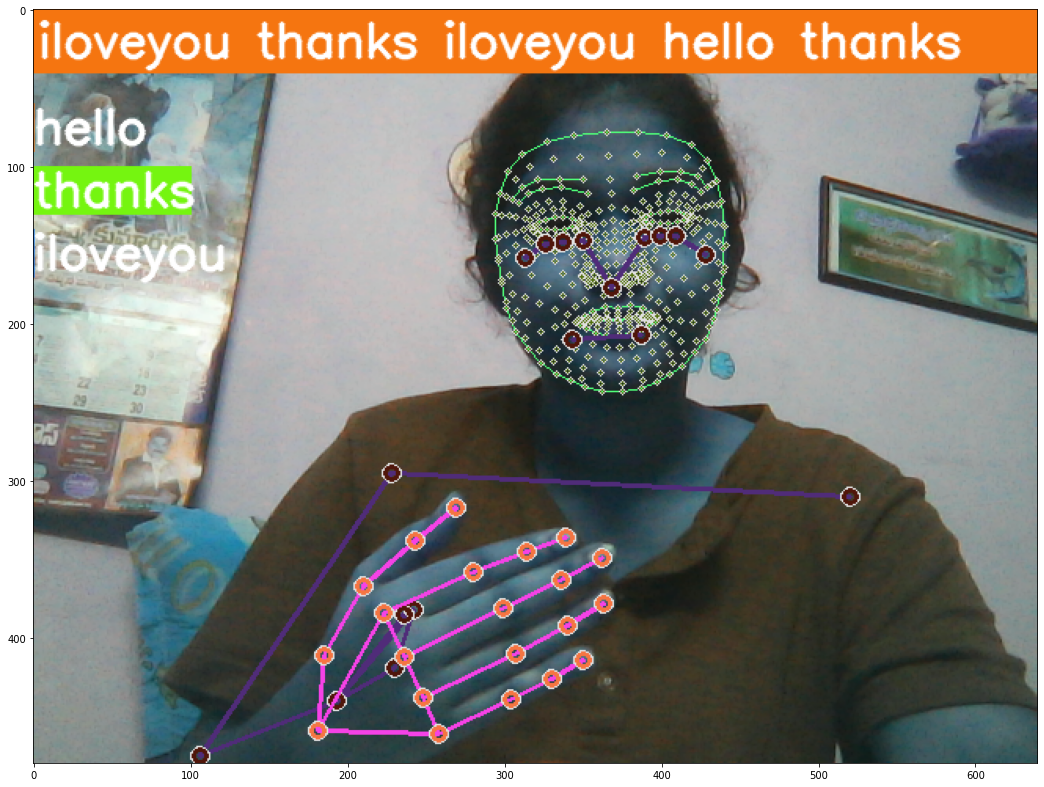

In [69]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))